## CMS_QCD

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 22,
     'axes.labelpad': 8.0,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14,
     'errorbar.capsize': 4
    }
    )

In [2]:
data_table_ak4_ybin1 = None
data_table_ak4_ybin2 = None
data_table_ak4_ybin3 = None
data_table_ak4_ybin4 = None
with open( "HEPData/CMS-JHEP12-035-2022-ins1972986-ak4-ybin1.json" ) as f:
    data_table_ak4_ybin1 = json.load( f )
with open( "HEPData/CMS-JHEP12-035-2022-ins1972986-ak4-ybin2.json" ) as f:
    data_table_ak4_ybin2 = json.load( f )
with open( "HEPData/CMS-JHEP12-035-2022-ins1972986-ak4-ybin3.json" ) as f:
    data_table_ak4_ybin3 = json.load( f )
with open( "HEPData/CMS-JHEP12-035-2022-ins1972986-ak4-ybin4.json" ) as f:
    data_table_ak4_ybin4 = json.load( f )

In [3]:
from get_df_json_CMS_QCD import *

df_CMS_QCD_ak4_ybin1 = get_df_json_CMS_QCD( data_table_ak4_ybin1 )
df_CMS_QCD_ak4_ybin2 = get_df_json_CMS_QCD( data_table_ak4_ybin2 )
df_CMS_QCD_ak4_ybin3 = get_df_json_CMS_QCD( data_table_ak4_ybin3 )
df_CMS_QCD_ak4_ybin4 = get_df_json_CMS_QCD( data_table_ak4_ybin4 )

['Jet p_{T} [GeV]', '#sigma [pb/GeV]']
97.0, 133.0, 9375.9 ±43.735 (all uncorr. unc. 1) ±100.46 (AbsoluteMPFBias) ±61.326 (AbsoluteScale) ±0.54818 (fake) ±298.59 (FlavorQCD) ±22.409 (Fragmentation) ±98.103 (JER) ±9.8673 (miss) ±66.009 (PileUpDataMC) ±6.9162 (PileUpPtBB) ±0.47979 (PileUpPtEC1) ±0.011386 (PileUpPtEC2) ±16.19 (PileUpPtRef) ±21.655 (Pref) ±3.5968 (PU) ±70.198 (RelativeBal) ±124.31 (RelativeFSR) ±2.386 (RelativeJEREC1) ±0.39501 (RelativeJEREC2) ±16.309 (RelativePtBB) ±0.02444 (RelativePtEC1) ±0.0055975 (RelativePtEC2) ±116.63 (RelativeSample) ±1.4105 (RelativeStatEC) ±7.1255 (RelativeStatFSR) ±34.572 (SinglePionECAL) ±11.851 (SinglePionHCAL) ±129.87 (TimePtEta) ±112.51 (Lumi) ±29.216 (model)
133.0, 174.0, 2186.6 ±10.571 (all uncorr. unc. 1) ±24.818 (AbsoluteMPFBias) ±15.188 (AbsoluteScale) ±0.023028 (fake) ±59.392 (FlavorQCD) ±3.4193 (Fragmentation) ±18.245 (JER) ±1.7386 (miss) ±11.521 (PileUpDataMC) ±2.3232 (PileUpPtBB) ±0.019871 (PileUpPtEC1) ±0.0014395 (PileUpPtEC2) ±3.1

In [4]:
df_CMS_QCD_ak4_ybin1[ 'X_low' ]

0       97.0
1      133.0
2      174.0
3      220.0
4      272.0
5      330.0
6      395.0
7      468.0
8      548.0
9      638.0
10     737.0
11     846.0
12     967.0
13    1101.0
14    1248.0
15    1410.0
16    1588.0
17    1784.0
18    2000.0
19    2238.0
20    2500.0
21    2787.0
Name: X_low, dtype: float64

In [5]:
bins_pt = df_CMS_QCD_ak4_ybin1[ 'X_low' ].append( pd.Series( df_CMS_QCD_ak4_ybin1[ 'X_high' ].iloc[-1] ), ignore_index=True )
print( np.array( bins_pt ) )

[  97.  133.  174.  220.  272.  330.  395.  468.  548.  638.  737.  846.
  967. 1101. 1248. 1410. 1588. 1784. 2000. 2238. 2500. 2787. 3103.]


In [6]:
def process_data( df ):
    df.loc[ :, 'X_center' ] = ( df.loc[ :, 'X_low' ] + ( df.loc[ :, 'X_high' ] - df.loc[ :, 'X_low' ] ) / 2 )
    ncols = df.columns.size
    df.loc[ :, 'err_tot' ] = np.sqrt( ( df.iloc[ :, 3:ncols ] ** 2 ).sum( axis='columns' ) )
    return df

df_CMS_QCD_ak4_ybin1 = process_data( df_CMS_QCD_ak4_ybin1 )
df_CMS_QCD_ak4_ybin2 = process_data( df_CMS_QCD_ak4_ybin2 )
df_CMS_QCD_ak4_ybin3 = process_data( df_CMS_QCD_ak4_ybin3 )
df_CMS_QCD_ak4_ybin4 = process_data( df_CMS_QCD_ak4_ybin4 )
df_CMS_QCD_ak4_all = {
    'ybin1': df_CMS_QCD_ak4_ybin1,
    'ybin2': df_CMS_QCD_ak4_ybin2,
    'ybin3': df_CMS_QCD_ak4_ybin3,
    'ybin4': df_CMS_QCD_ak4_ybin4
}

In [7]:
df_CMS_QCD_ak4_all[ 'ybin1' ]

,X_low,X_high,val,all uncorr. unc. 1,AbsoluteMPFBias,AbsoluteScale,fake,FlavorQCD,Fragmentation,JER,...,RelativeSample,RelativeStatEC,RelativeStatFSR,SinglePionECAL,SinglePionHCAL,TimePtEta,Lumi,model,X_center,err_tot
0,97.0,133.0,9375.900000,43.735000,1.004600e+02,6.132600e+01,5.481800e-01,2.985900e+02,2.240900e+01,9.810300e+01,...,1.166300e+02,1.410500e+00,7.125500e+00,3.457200e+01,1.185100e+01,1.298700e+02,1.125100e+02,2.921600e+01,115.0,446.701183
1,133.0,174.0,2186.600000,10.571000,2.481800e+01,1.518800e+01,2.302800e-02,5.939200e+01,3.419300e+00,1.824500e+01,...,2.430200e+01,4.671600e-02,1.765600e+00,4.664300e+00,1.753700e+00,3.524000e+01,2.623900e+01,1.152700e+00,153.5,178.710601
2,174.0,220.0,604.760000,2.575200,7.245100e+00,4.372100e+00,3.249200e-03,1.463600e+01,5.135600e-01,4.714300e+00,...,5.878500e+00,1.351300e-02,5.131500e-01,6.236300e-01,2.435200e-01,1.077000e+01,7.257200e+00,1.195900e+00,197.0,198.479354
3,220.0,272.0,187.910000,0.910950,2.347300e+00,1.403600e+00,1.488400e-03,4.075800e+00,3.995400e-02,1.376300e+00,...,1.572400e+00,5.574300e-03,1.663100e-01,5.999000e-02,9.329300e-03,3.605300e+00,2.255000e+00,5.622800e-01,246.0,246.108832
4,272.0,330.0,62.720000,0.290450,8.065700e-01,4.841600e-01,3.434600e-04,1.206500e+00,2.559700e-02,4.364800e-01,...,4.513000e-01,1.429300e-03,5.759200e-02,3.221500e-02,2.005500e-02,1.278700e+00,7.526400e-01,2.149200e-01,301.0,301.009465
5,330.0,395.0,22.311000,0.092298,2.937600e-01,1.768300e-01,4.337700e-05,3.755800e-01,2.088000e-02,1.495200e-01,...,1.355900e-01,2.740200e-04,2.116900e-02,2.423800e-02,1.280700e-02,4.860500e-01,2.677400e-01,6.651800e-02,362.5,362.500966
6,395.0,468.0,8.396100,0.032499,1.130400e-01,6.818100e-02,7.773700e-06,1.213900e-01,1.200800e-02,5.353600e-02,...,4.146700e-02,2.549600e-05,8.207000e-03,1.335500e-02,7.164200e-03,1.940200e-01,1.007500e-01,1.843300e-02,431.5,431.500112
7,468.0,548.0,3.245400,0.013168,4.472300e-02,2.701100e-02,7.912200e-06,3.934400e-02,6.143500e-03,1.945200e-02,...,1.231200e-02,9.135100e-06,3.259400e-03,6.645200e-03,3.618300e-03,7.902600e-02,3.894400e-02,5.680100e-03,508.0,508.000014
8,548.0,638.0,1.300900,0.004346,1.839900e-02,1.112000e-02,3.299600e-06,1.276800e-02,3.033000e-03,7.262900e-03,...,3.431900e-03,6.330600e-06,1.342200e-03,3.246800e-03,1.773000e-03,3.320900e-02,1.561000e-02,2.052800e-03,593.0,593.000002
9,638.0,737.0,0.527360,0.001762,7.683200e-03,4.649600e-03,7.798400e-07,3.966800e-03,1.450500e-03,2.735500e-03,...,7.752800e-04,1.873600e-06,5.582900e-04,1.565300e-03,8.438500e-04,1.405800e-02,6.328300e-03,7.475300e-04,687.5,687.500000


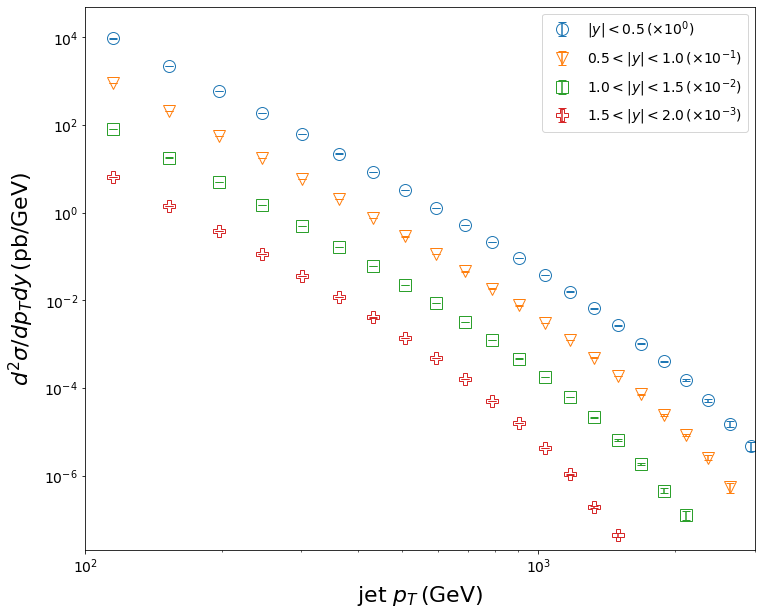

In [8]:
fig = plt.figure( figsize=(12,10) )
markers = [ 'o', 'v', 's', 'P' ]
factors = {
    'ybin1': 1e+00,
    'ybin2': 1e-01,
    'ybin3': 1e-02,
    'ybin4': 1e-03,
}
labels = {
    'ybin1': r"$|y| < 0.5 \,(\times 10^0)$",
    'ybin2': r"$0.5 < |y| < 1.0 \,(\times 10^{-1})$",
    'ybin3': r"$1.0 < |y| < 1.5 \,(\times 10^{-2})$",
    'ybin4': r"$1.5 < |y| < 2.0 \,(\times 10^{-3})$",
}
for idx__, key__ in enumerate( df_CMS_QCD_ak4_all ):
    df__ = df_CMS_QCD_ak4_all[ key__ ]
    X__   = df__.loc[ :, 'X_center' ]
    val__ = df__.loc[ :, 'val' ]
    err__ = df__.iloc[ :, 3 ]
    plt.errorbar( X__, ( val__ * factors[ key__ ] ), yerr=( err__ * factors[ key__ ] ), label=labels[ key__ ], marker=markers[ idx__ % len( markers ) ], fillstyle='none', markersize=12, linestyle='none' )

plt.xlabel( r'jet $p_T\,(\rm{GeV})$' )
plt.ylabel( r'$d^2\sigma/dp_T dy \,(\rm{pb}/\rm{GeV})$' )

plt.xlim( 1e+02, 3e+03 )
plt.ylim( 2e-08, 5e+04 )
plt.xscale( 'log' )
plt.yscale( 'log' )
plt.legend( loc='best' )


## Jets

In [9]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from read_lhe_uproot import *
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 22,
     'axes.labelpad': 8.0,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )

In [10]:
df = read_lhe_uproot('jatos_pt/Events/run_01/unweighted_events.root')
df

['Event', 'Event/Event.fUniqueID', 'Event/Event.fBits', 'Event/Event.Number', 'Event/Event.Nparticles', 'Event/Event.ProcessID', 'Event/Event.Weight', 'Event/Event.ScalePDF', 'Event/Event.CouplingQED', 'Event/Event.CouplingQCD', 'Event_size', 'Rwgt', 'Rwgt/Rwgt.fUniqueID', 'Rwgt/Rwgt.fBits', 'Rwgt/Rwgt.Weight', 'Rwgt_size', 'Particle', 'Particle/Particle.fUniqueID', 'Particle/Particle.fBits', 'Particle/Particle.PID', 'Particle/Particle.Status', 'Particle/Particle.Mother1', 'Particle/Particle.Mother2', 'Particle/Particle.ColorLine1', 'Particle/Particle.ColorLine2', 'Particle/Particle.Px', 'Particle/Particle.Py', 'Particle/Particle.Pz', 'Particle/Particle.E', 'Particle/Particle.M', 'Particle/Particle.PT', 'Particle/Particle.Eta', 'Particle/Particle.Phi', 'Particle/Particle.Rapidity', 'Particle/Particle.LifeTime', 'Particle/Particle.Spin', 'Particle_size']
Number of events: 10000


,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event
event,,,,,,,,,,,,,,,,,,
1,21,-1,-1,-1,503,501,0.000000,0.000000,329.532582,329.532582,0.0,0.000000,999.900000,0.000000,999.900000,0.0,-1.0,1
1,21,-1,-1,-1,504,502,-0.000000,-0.000000,-86.477323,86.477323,0.0,0.000000,-999.900000,0.000000,-999.900000,0.0,-1.0,1
1,21,1,0,1,503,502,4.001246,145.778396,226.297126,269.216902,0.0,145.833298,1.223131,1.543356,1.223131,0.0,-1.0,1
1,21,1,0,1,504,501,-4.001246,-145.778396,16.758132,146.793003,0.0,145.833298,0.114662,-1.598237,0.114662,0.0,-1.0,1
2,2,-1,-1,-1,503,0,-0.000000,0.000000,330.816607,330.816607,0.0,0.000000,999.900000,0.000000,999.900000,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,21,1,0,1,504,501,194.597791,-39.620024,-210.845954,289.644718,0.0,198.590147,-0.924346,-0.200854,-0.924346,0.0,-1.0,9999
10000,21,-1,-1,-1,504,501,0.000000,0.000000,1343.291060,1343.291060,0.0,0.000000,999.900000,0.000000,999.900000,0.0,-1.0,10000
10000,21,-1,-1,-1,503,502,-0.000000,-0.000000,-7.646069,7.646069,0.0,0.000000,-999.900000,0.000000,-999.900000,0.0,-1.0,10000


In [11]:
# Todos os Jatos
selection = ((df.Status == 1))

df_sel = df [selection]
df_sel.head(10)

#pd.set_option('display.max_rows', None) # expandindo para visualização máxima do número de linhas
#df_sel # tabela específica para expandir

,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event
event,,,,,,,,,,,,,,,,,,
1,21,1,0,1,503,502,4.001246,145.778396,226.297126,269.216902,0.0,145.833298,1.223131,1.543356,1.223131,0.0,-1.0,1
1,21,1,0,1,504,501,-4.001246,-145.778396,16.758132,146.793003,0.0,145.833298,0.114662,-1.598237,0.114662,0.0,-1.0,1
2,21,1,0,1,503,502,106.998566,10.733286,164.288619,196.353372,0.0,107.535559,1.210064,0.099978,1.210064,0.0,1.0,2
2,2,1,0,1,501,0,-106.998566,-10.733286,131.285921,169.705302,0.0,107.535559,1.029260,-3.041615,1.029260,0.0,1.0,2
3,21,1,0,1,503,501,16.977020,106.190279,-612.265824,621.638185,0.0,107.538805,-2.440087,1.412264,-2.440087,0.0,-1.0,3
3,2,1,0,1,501,0,-16.977020,-106.190279,154.418226,188.174342,0.0,107.538805,1.158690,-1.729328,1.158690,0.0,1.0,3
4,21,1,0,1,503,502,46.998125,97.536431,-11.408243,108.868394,0.0,108.269013,-0.105175,1.121772,-0.105175,0.0,-1.0,4
4,1,1,0,1,501,0,-46.998125,-97.536431,-526.753693,537.765406,0.0,108.269013,-2.285659,-2.019820,-2.285659,0.0,1.0,4
5,21,1,0,1,503,502,17.933598,-103.237321,980.229995,985.814588,0.0,104.783388,2.931884,-1.398800,2.931884,0.0,-1.0,5


In [12]:
( np.abs( df['Rapidity'] ) >= 1.0 )

event
1         True
1         True
1         True
1        False
2         True
         ...  
9999     False
10000     True
10000     True
10000     True
10000     True
Name: Rapidity, Length: 40000, dtype: bool

In [13]:
def select_data( df, y_min, y_max ):
    msk_sel = ( np.abs( df['Rapidity'] ) >= y_min ) & ( np.abs( df['Rapidity'] ) < y_max )
    return df[ msk_sel ]

df_sel_ybin1 = select_data( df_sel, y_min=0., y_max=0.5 )
df_sel_ybin2 = select_data( df_sel, y_min=0.5, y_max=1.0 )
df_sel_ybin3 = select_data( df_sel, y_min=1.0, y_max=1.5 )
df_sel_ybin4 = select_data( df_sel, y_min=1.5, y_max=2.0 )
df_sel_all = {
    'ybin1': df_sel_ybin1,
    'ybin2': df_sel_ybin2,
    'ybin3': df_sel_ybin3,
    'ybin4': df_sel_ybin4
}


In [14]:
df_sel_all[ "ybin2" ]

,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event
event,,,,,,,,,,,,,,,,,,
10,3,1,0,1,502,0,-170.959474,-212.568834,-210.061181,344.293989,0.0,272.786823,-0.709115,-2.248126,-0.709115,0.0,-1.0,10
18,21,1,0,1,503,502,127.615850,51.766519,102.391547,171.608877,0.0,137.715568,0.687939,0.385362,0.687939,0.0,-1.0,18
19,21,1,0,1,503,502,-134.405709,-92.276998,152.971203,223.562358,0.0,163.033551,0.837051,-2.539947,0.837051,0.0,1.0,19
20,21,1,0,1,503,501,-54.084442,91.070236,79.515122,132.444590,0.0,105.919379,0.693718,2.106701,0.693718,0.0,1.0,20
20,-2,1,0,1,0,502,54.084442,-91.070236,115.287040,156.556752,0.0,105.919379,0.942549,-1.034892,0.942549,0.0,1.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,21,1,0,1,503,502,30.222522,-117.150838,68.884389,139.222048,0.0,120.986444,0.542371,-1.318322,0.542371,0.0,-1.0,9992
9993,21,1,0,1,503,502,21.387786,135.378324,-145.927423,200.198753,0.0,137.057389,-0.926404,1.414106,-0.926404,0.0,-1.0,9993
9997,21,1,0,1,503,501,-88.853414,-89.851190,-95.005706,158.095698,0.0,126.365207,-0.694614,-2.350611,-0.694614,0.0,1.0,9997


In [15]:
bins_pt = np.array(
    [  97. ,  133. ,  174. ,  220. ,  272. ,  330. ,  395. ,  468. ,  548. ,  638. ,  737. , 846. ,
      967. , 1101. , 1248. , 1410. , 1588. , 1784. , 2000. , 2238. , 2500. , 2787. , 3103. ] )
bins_pt

array([  97.,  133.,  174.,  220.,  272.,  330.,  395.,  468.,  548.,
        638.,  737.,  846.,  967., 1101., 1248., 1410., 1588., 1784.,
       2000., 2238., 2500., 2787., 3103.])

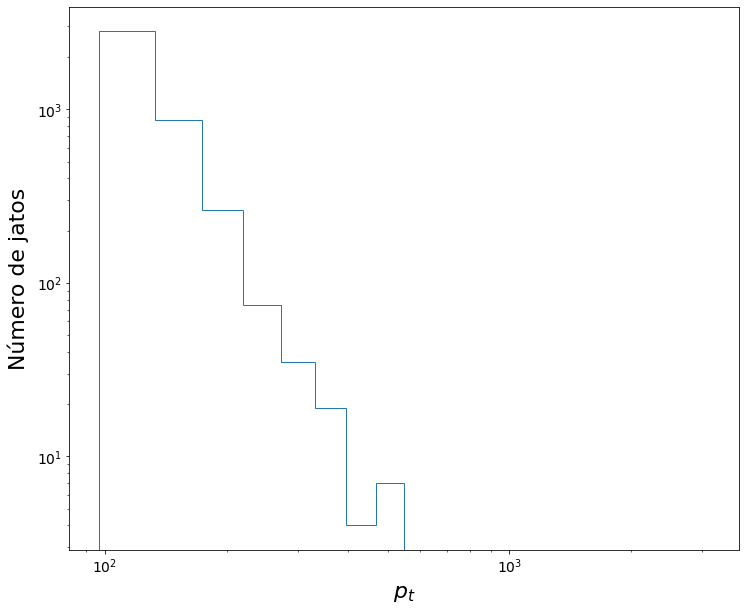

In [16]:
fig = plt.figure (figsize=(12,10))

plt.hist( df_sel_all[ 'ybin1' ][ 'PT' ], histtype='step', bins=bins_pt )
plt.xlabel('$p_t$')
plt.ylabel('Número de jatos')
plt.xscale( 'log' )
plt.yscale( 'log' )


In [17]:
# Número de eventos

# index_nonduplicated = df_sel.index[ ( ~df_sel.index.duplicated() ) ]
# print( index_nonduplicated )
# n_events = index_nonduplicated.size
# print( n_events )

n_events = 10000
cross_section = 1.2592e+06
ybin_width = 0.5
for key in df_sel_all:
    df_ = df_sel_all[ key ]
    df_.loc[ :, 'norm' ] = ( ( cross_section / n_events ) / ybin_width )

/home/maressa/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [18]:
df_sel_all[ 'ybin2' ]

,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event,norm
event,,,,,,,,,,,,,,,,,,,
10,3,1,0,1,502,0,-170.959474,-212.568834,-210.061181,344.293989,0.0,272.786823,-0.709115,-2.248126,-0.709115,0.0,-1.0,10,251.84
18,21,1,0,1,503,502,127.615850,51.766519,102.391547,171.608877,0.0,137.715568,0.687939,0.385362,0.687939,0.0,-1.0,18,251.84
19,21,1,0,1,503,502,-134.405709,-92.276998,152.971203,223.562358,0.0,163.033551,0.837051,-2.539947,0.837051,0.0,1.0,19,251.84
20,21,1,0,1,503,501,-54.084442,91.070236,79.515122,132.444590,0.0,105.919379,0.693718,2.106701,0.693718,0.0,1.0,20,251.84
20,-2,1,0,1,0,502,54.084442,-91.070236,115.287040,156.556752,0.0,105.919379,0.942549,-1.034892,0.942549,0.0,1.0,20,251.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,21,1,0,1,503,502,30.222522,-117.150838,68.884389,139.222048,0.0,120.986444,0.542371,-1.318322,0.542371,0.0,-1.0,9992,251.84
9993,21,1,0,1,503,502,21.387786,135.378324,-145.927423,200.198753,0.0,137.057389,-0.926404,1.414106,-0.926404,0.0,-1.0,9993,251.84
9997,21,1,0,1,503,501,-88.853414,-89.851190,-95.005706,158.095698,0.0,126.365207,-0.694614,-2.350611,-0.694614,0.0,1.0,9997,251.84


[ 36.  41.  46.  52.  58.  65.  73.  80.  90.  99. 109. 121. 134. 147.
 162. 178. 196. 216. 238. 262. 287. 316.]
[ 115.   153.5  197.   246.   301.   362.5  431.5  508.   593.   687.5
  791.5  906.5 1034.  1174.5 1329.  1499.  1686.  1892.  2119.  2369.
 2643.5 2945. ]
[708425.92       217589.75999997  66485.75999999  18888.
   8814.4          4784.96         1007.36         1762.88
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.        ]
[  97.  133.  174.  220.  272.  330.  395.  468.  548.  638.  737.  846.
  967. 1101. 1248. 1410. 1588. 1784. 2000. 2238. 2500. 2787. 3103.]
[1.96784978e+04 5.30706732e+03 1.44534261e+03 3.63230769e+02
 1.51972414e+02 7.36147692e+01 1.37994521e+01 2.20360000e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

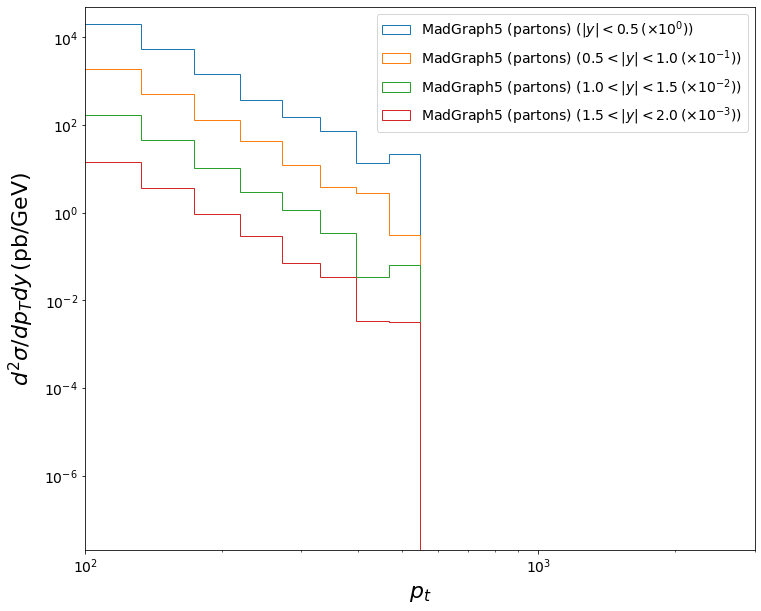

In [19]:
# Histograma normalizado

bin_widths_pt = ( bins_pt[1:] - bins_pt[:-1] )
print ( bin_widths_pt )

bin_centers_pt = (  bins_pt[1:] + bins_pt[:-1] ) / 2
print ( bin_centers_pt )

factors = {
    'ybin1': 1e+00,
    'ybin2': 1e-01,
    'ybin3': 1e-02,
    'ybin4': 1e-03
}

labels = {
    'ybin1': r"MadGraph5 (partons) ($|y| < 0.5 \,(\times 10^0)$)",
    'ybin2': r"MadGraph5 (partons) ($0.5 < |y| < 1.0 \,(\times 10^{-1})$)",
    'ybin3': r"MadGraph5 (partons) ($1.0 < |y| < 1.5 \,(\times 10^{-2})$)",
    'ybin4': r"MadGraph5 (partons) ($1.5 < |y| < 2.0 \,(\times 10^{-3})$)"
}

fig = plt.figure (figsize=(12,10))

for key in df_sel_all:
    sum_weights, bins_ = np.histogram( df_sel_all[ key ][ 'PT' ], bins=bins_pt, weights=df_sel_all[ key ][ 'norm' ] )
    print ( sum_weights )
    print ( bins_ )

    sum_weights_corr = ( sum_weights / bin_widths_pt ) * factors[ key ]
    print ( sum_weights_corr )

    # plt.errorbar( bin_centers_pt, sum_weights_corr )
    hist2 = plt.hist( bin_centers_pt, bins=bins_pt, weights=sum_weights_corr, histtype='step', label=labels[ key ] )

plt.xlabel('$p_t$')
plt.ylabel( r'$d^2\sigma/dp_T dy \,(\rm{pb}/\rm{GeV})$' )
plt.xlim( 1e+02, 3e+03 )
plt.ylim( 2e-08, 5e+04 )
plt.xscale( 'log' )
plt.yscale( 'log' )
plt.legend( loc='best' )

## Histograms

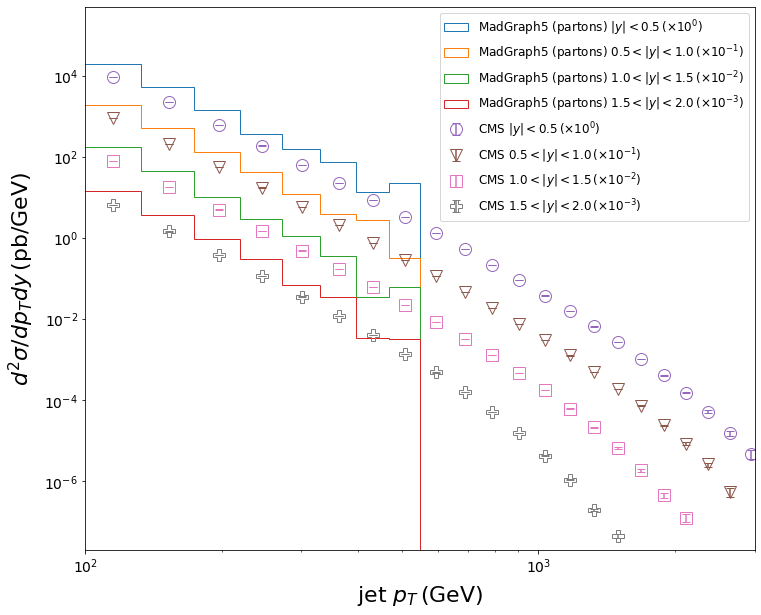

In [20]:

# Histograma normalizado
fig = plt.figure (figsize=(12,10))

bin_widths_pt = ( bins_pt[1:] - bins_pt[:-1] )
#print ( bin_widths_pt )

bin_centers_pt = (  bins_pt[1:] + bins_pt[:-1] ) / 2
#print ( bin_centers_pt )

factors = {
    'ybin1': 1e+00,
    'ybin2': 1e-01,
    'ybin3': 1e-02,
    'ybin4': 1e-03
}

labels_MC = {
    'ybin1': r"MadGraph5 (partons) $|y| < 0.5 \,(\times 10^0)$",
    'ybin2': r"MadGraph5 (partons) $0.5 < |y| < 1.0 \,(\times 10^{-1})$",
    'ybin3': r"MadGraph5 (partons) $1.0 < |y| < 1.5 \,(\times 10^{-2})$",
    'ybin4': r"MadGraph5 (partons) $1.5 < |y| < 2.0 \,(\times 10^{-3})$"
}

for key in df_sel_all:
    sum_weights, bins_ = np.histogram( df_sel_all[ key ][ 'PT' ], bins=bins_pt, weights=df_sel_all[ key ][ 'norm' ] )
    #print ( sum_weights )
    #print ( bins_ )

    sum_weights_corr = ( sum_weights / bin_widths_pt ) * factors[ key ]
    #print ( sum_weights_corr )

    # plt.errorbar( bin_centers_pt, sum_weights_corr )
    plt.hist( bin_centers_pt, bins=bins_pt, weights=sum_weights_corr, histtype='step', label=labels_MC[ key ] )

# plt.xlabel('$p_t$')
# plt.ylabel( r'$d^2\sigma/dp_T dy \,(\rm{pb}/\rm{GeV})$' )
# plt.xlim( 1e+02, 3e+03 )
# plt.ylim( 2e-08, 5e+04 )
# plt.xscale( 'log' )
# plt.yscale( 'log' )
# plt.legend( loc='best' )

##

markers = [ 'o', 'v', 's', 'P' ]

# factors = {
#     'ybin1': 1e+00,
#     'ybin2': 1e-01,
#     'ybin3': 1e-02,
#     'ybin4': 1e-03,
# }

labels_data = {
    'ybin1': r"CMS $|y| < 0.5 \,(\times 10^0)$",
    'ybin2': r"CMS $0.5 < |y| < 1.0 \,(\times 10^{-1})$",
    'ybin3': r"CMS $1.0 < |y| < 1.5 \,(\times 10^{-2})$",
    'ybin4': r"CMS $1.5 < |y| < 2.0 \,(\times 10^{-3})$",
}
for idx__, key__ in enumerate( df_CMS_QCD_ak4_all ):
    df__ = df_CMS_QCD_ak4_all[ key__ ]
    X__   = df__.loc[ :, 'X_center' ]
    val__ = df__.loc[ :, 'val' ]
    err__ = df__.iloc[ :, 3 ]
    plt.errorbar( X__, ( val__ * factors[ key__ ] ), yerr=( err__ * factors[ key__ ] ), label=labels_data[ key__ ], marker=markers[ idx__ % len( markers ) ], fillstyle='none', markersize=12, linestyle='none' )

plt.xlabel( r'jet $p_T\,(\rm{GeV})$' )
plt.ylabel( r'$d^2\sigma/dp_T dy \,(\rm{pb}/\rm{GeV})$' )

plt.xlim( 1e+02, 3e+03 )
# plt.ylim( 2e-08, 5e+04 )
plt.ylim( 2e-08, 5e+05 )
plt.xscale( 'log' )
plt.yscale( 'log' )
plt.legend( loc='upper right', fontsize=12 )

## Plot com runs de 50000 eventos

In [21]:
dir__ = 'Jatos_500k'
path__ = 'Jatos_500k/Events/run_01/unweighted_events.root'.format( dir__ )
df_ptbin1 = read_lhe_uproot( path__ )
path__ = 'Jatos_500k/Events/run_02/unweighted_events.root'.format( dir__ )
df_ptbin2 = read_lhe_uproot( path__ )
path__ = 'Jatos_500k/Events/run_03/unweighted_events.root'.format( dir__ )
df_ptbin3 = read_lhe_uproot( path__ )
path__ = 'Jatos_500k/Events/run_04/unweighted_events.root'.format( dir__ )
df_ptbin4 = read_lhe_uproot( path__ )

['Event', 'Event/Event.fUniqueID', 'Event/Event.fBits', 'Event/Event.Number', 'Event/Event.Nparticles', 'Event/Event.ProcessID', 'Event/Event.Weight', 'Event/Event.ScalePDF', 'Event/Event.CouplingQED', 'Event/Event.CouplingQCD', 'Event_size', 'Rwgt', 'Rwgt/Rwgt.fUniqueID', 'Rwgt/Rwgt.fBits', 'Rwgt/Rwgt.Weight', 'Rwgt_size', 'Particle', 'Particle/Particle.fUniqueID', 'Particle/Particle.fBits', 'Particle/Particle.PID', 'Particle/Particle.Status', 'Particle/Particle.Mother1', 'Particle/Particle.Mother2', 'Particle/Particle.ColorLine1', 'Particle/Particle.ColorLine2', 'Particle/Particle.Px', 'Particle/Particle.Py', 'Particle/Particle.Pz', 'Particle/Particle.E', 'Particle/Particle.M', 'Particle/Particle.PT', 'Particle/Particle.Eta', 'Particle/Particle.Phi', 'Particle/Particle.Rapidity', 'Particle/Particle.LifeTime', 'Particle/Particle.Spin', 'Particle_size']
Number of events: 500000
['Event', 'Event/Event.fUniqueID', 'Event/Event.fBits', 'Event/Event.Number', 'Event/Event.Nparticles', 'Even

In [22]:
df_ptbins = {
    'ptbin1': df_ptbin1,
    'ptbin2': df_ptbin2,
    'ptbin3': df_ptbin3,
    'ptbin4': df_ptbin4
}

df_ptbins[ 'ptbin1' ]

,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event
event,,,,,,,,,,,,,,,,,,
1,21,-1,-1,-1,503,501,0.000000,0.000000,127.891863,127.891863,0.0,0.000000,999.900000,0.000000,999.900000,0.0,1.0,1
1,21,-1,-1,-1,504,502,-0.000000,-0.000000,-282.954427,282.954427,0.0,0.000000,-999.900000,0.000000,-999.900000,0.0,1.0,1
1,21,1,0,1,503,502,-91.570457,-8.977425,-257.327514,273.282258,0.0,92.009471,-1.752135,-3.043867,-1.752135,0.0,1.0,1
1,21,1,0,1,504,501,91.570457,8.977425,102.264951,137.564032,0.0,92.009471,0.958035,0.097726,0.958035,0.0,1.0,1
2,2,-1,-1,-1,503,0,-0.000000,0.000000,2203.538899,2203.538899,0.0,0.000000,999.900000,0.000000,999.900000,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499999,21,1,0,1,504,502,-91.874566,29.224342,-25.230289,99.657241,0.0,96.410570,-0.258798,2.833624,-0.258798,0.0,-1.0,499999
500000,21,-1,-1,-1,503,501,0.000000,0.000000,1141.045696,1141.045696,0.0,0.000000,999.900000,0.000000,999.900000,0.0,1.0,500000
500000,21,-1,-1,-1,504,502,-0.000000,-0.000000,-20.744840,20.744840,0.0,0.000000,-999.900000,0.000000,-999.900000,0.0,1.0,500000


In [23]:
cross_section = { # pb
    'ptbin1': 1.97e+06,
    'ptbin2': 9.525,
    'ptbin3': 0.04176,
    'ptbin4': 0.0003876
}

n_events = {
    'ptbin1': 500000,
    'ptbin2': 500000,
    'ptbin3': 500000,
    'ptbin4': 500000
}

norm = {}
for key__ in cross_section:
    norm[ key__ ] = cross_section[ key__ ] / n_events[ key__ ]

norm

{'ptbin1': 3.94,
 'ptbin2': 1.9050000000000002e-05,
 'ptbin3': 8.352e-08,
 'ptbin4': 7.752e-10}

In [24]:
bins = [  97. , 133. , 174. , 220. , 272. , 330. , 395. , 468. , 548. , 638. , 737. , 846. ,
         967. , 1101. , 1248. , 1410. , 1588. , 1784. , 2000. , 2238. , 2500. , 2787. , 3103. ]
bins = np.array( bins )

bin_centres = ( bins[:-1] + bins[1:] ) / 2

bin_widths = ( bins[1:] - bins[:-1] )

print ( bins ) 
print ( bin_centres )
print ( bin_widths )

[  97.  133.  174.  220.  272.  330.  395.  468.  548.  638.  737.  846.
  967. 1101. 1248. 1410. 1588. 1784. 2000. 2238. 2500. 2787. 3103.]
[ 115.   153.5  197.   246.   301.   362.5  431.5  508.   593.   687.5
  791.5  906.5 1034.  1174.5 1329.  1499.  1686.  1892.  2119.  2369.
 2643.5 2945. ]
[ 36.  41.  46.  52.  58.  65.  73.  80.  90.  99. 109. 121. 134. 147.
 162. 178. 196. 216. 238. 262. 287. 316.]


In [25]:
def process_select_data( df ):
    df__ = df
    selection__ = ( ( df__.Status == 1 ) & ( df__.PT >= bins[0] ) & ( df__.PT < bins[-1] ) )
    df_sel__ = df__[ selection__ ]
    return df_sel__

In [26]:
ybins = np.array( [0., 0.5, 1.0, 1.5, 2.0 ] )
ymin = ybins[:-1]
ymax = ybins[1:]
print ( ymin )
print ( ymax )

[0.  0.5 1.  1.5]
[0.5 1.  1.5 2. ]


In [27]:
#Não funciona pois esse código está tentando reindexar um objeto Pandas Series com um índice que contém
#valores duplicados. Isso não é permitido pelo Pandas.


#histos = {}
#for key__ in df_ptbins:
#    df_ptbins[ key__ ] = process_select_data( df_ptbins[ key__ ] )
#    df__ = df_ptbins[ key__ ]
#    for idx_y__ in range( len(ymin) ):
#        msk__ = ( ( np.abs( df__.Rapidity ) >= ymin[ idx_y__ ] ) & ( np.abs( df__.Rapidity ) < ymax[ idx_y__ ] ) )
#        counts__, bins = np.histogram( df.PT[ msk__ ], bins=bins )
#        histos_key__ = 'ybin'+str(idx_y__+1)
#        if histos_key__ not in histos.keys():
#            histos[ histos_key__ ] = ( counts__ * norm[ key__ ]  )
#        else:
#            histos[ histos_key__ ] += ( counts__ * norm[ key__ ] )
#histos



histos = {}
for key__ in df_ptbins:
    df_ptbins[ key__ ] = process_select_data( df_ptbins[ key__ ] )
    df__ = df_ptbins[ key__ ]
    for idx_y__ in range( len(ymin) ):
        msk__ = ( ( np.abs( df__.Rapidity ) >= ymin[ idx_y__ ] ) & ( np.abs( df__.Rapidity ) < ymax[ idx_y__ ] ) )
        counts__, bins = np.histogram(df__.PT[msk__], bins=bins)
        histos_key__ = 'ybin'+str(idx_y__+1)
        if histos_key__ not in histos.keys():
            histos[ histos_key__ ] = ( counts__ * norm[ key__ ]  )
        else:
            histos[ histos_key__ ] += ( counts__ * norm[ key__ ] )
histos


{'ybin1': array([4.25508180e+05, 1.08578520e+05, 3.25956200e+04, 1.11659600e+04,
        4.12912000e+03, 1.64298000e+03, 7.09200000e+02, 2.83680000e+02,
        1.73360000e+02, 3.54600000e+01, 2.75800000e+01, 1.18200000e+01,
        3.72890415e+00, 2.54416560e+00, 1.14608610e+00, 5.05510800e-01,
        2.15646000e-01, 8.63917500e-02, 3.45276691e-02, 1.24213450e-02,
        4.08955680e-03, 1.23277524e-03]),
 'ybin2': array([4.07025640e+05, 1.01821420e+05, 3.05113600e+04, 1.01770200e+04,
        3.69966000e+03, 1.54054000e+03, 7.36780000e+02, 2.08820000e+02,
        1.22140000e+02, 4.72800000e+01, 2.75800000e+01, 0.00000000e+00,
        6.98350420e+00, 2.01910950e+00, 8.67537000e-01, 3.61073700e-01,
        1.44818100e-01, 5.53783500e-02, 1.91547274e-02, 6.04785024e-03,
        1.66639104e-03, 4.04316437e-04]),
 'ybin3': array([3.66408180e+05, 9.20778000e+04, 2.71623600e+04, 8.85318000e+03,
        3.41204000e+03, 1.24110000e+03, 6.54040000e+02, 1.77300000e+02,
        1.06380000e+02, 2

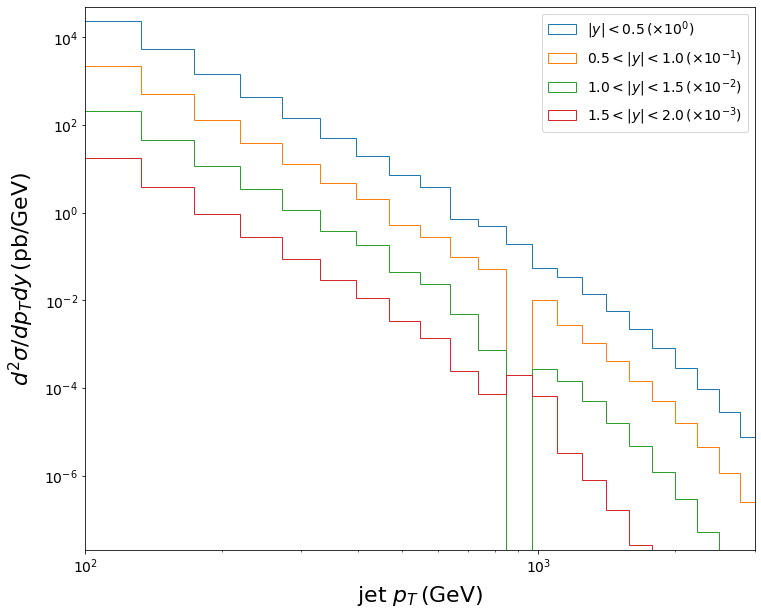

In [28]:
fig = plt.figure( figsize=(12,10) )

factors = {
    'ybin1': 1e+00,
    'ybin2': 1e-01,
    'ybin3': 1e-02,
    'ybin4': 1e-03,
}
labels = {
    'ybin1': r"$|y| < 0.5 \,(\times 10^0)$",
    'ybin2': r"$0.5 < |y| < 1.0 \,(\times 10^{-1})$",
    'ybin3': r"$1.0 < |y| < 1.5 \,(\times 10^{-2})$",
    'ybin4': r"$1.5 < |y| < 2.0 \,(\times 10^{-3})$",
}

for key__ in histos:
    plt.hist( bin_centres, weights=( ( histos[ key__ ] / bin_widths / 0.5 ) * factors[ key__ ] ), bins=bins, label=labels[ key__ ], histtype='step' )

plt.xlabel( r'jet $p_T\,(\rm{GeV})$' )
plt.ylabel( r'$d^2\sigma/dp_T dy \,(\rm{pb}/\rm{GeV})$' )

plt.xlim( 1e+02, 3e+03 )
plt.ylim( 2e-08, 5e+04 )
plt.xscale( 'log' )
plt.yscale( 'log' )
plt.legend( loc='best' )

In [29]:
df_ptbins[ 'ptbin1' ]

,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event
event,,,,,,,,,,,,,,,,,,
2,21,1,0,1,503,502,-98.786814,40.771187,386.283790,400.794575,0.0,106.869661,1.996718,2.750170,1.996718,0.0,1.0,2
2,2,1,0,1,501,0,98.786814,-40.771187,1808.422213,1811.577220,0.0,106.869661,3.522619,-0.391423,3.522619,0.0,1.0,2
3,4,1,0,1,501,0,-75.506899,-104.457580,191.528265,230.858732,0.0,128.890177,1.186961,-2.196692,1.186961,0.0,-1.0,3
3,-4,1,0,1,0,502,75.506899,104.457580,222.041542,256.739409,0.0,128.890177,1.312282,0.944900,1.312282,0.0,1.0,3
4,21,1,0,1,503,504,93.005551,51.829116,-117.050079,158.230878,0.0,106.472014,-0.949910,0.508407,-0.949910,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499996,3,1,0,1,501,0,91.552499,44.942302,-1440.212763,1443.819405,0.0,101.988581,-3.342084,0.456334,-3.342084,0.0,-1.0,499996
499997,21,1,0,1,503,502,-98.325311,64.521894,-843.424944,851.584745,0.0,117.605023,-2.668112,2.560865,-2.668112,0.0,-1.0,499997
499997,21,1,0,1,504,503,98.325311,-64.521894,-2.680831,117.635574,0.0,117.605023,-0.022793,-0.580727,-0.022793,0.0,-1.0,499997


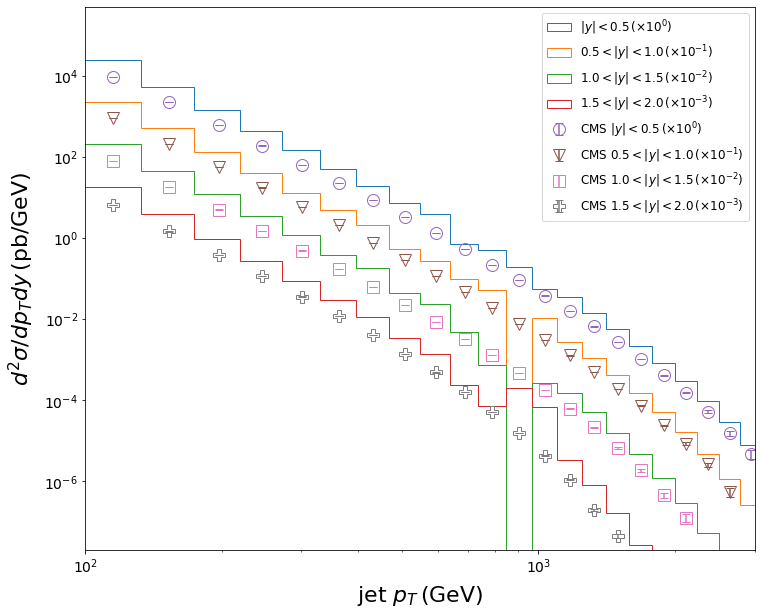

In [31]:
fig = plt.figure( figsize=(12,10) )

factors = {
    'ybin1': 1e+00,
    'ybin2': 1e-01,
    'ybin3': 1e-02,
    'ybin4': 1e-03,
}
labels = {
    'ybin1': r"$|y| < 0.5 \,(\times 10^0)$",
    'ybin2': r"$0.5 < |y| < 1.0 \,(\times 10^{-1})$",
    'ybin3': r"$1.0 < |y| < 1.5 \,(\times 10^{-2})$",
    'ybin4': r"$1.5 < |y| < 2.0 \,(\times 10^{-3})$",
}

for key__ in histos:
    plt.hist( bin_centres, weights=( ( histos[ key__ ] / bin_widths / 0.5 ) * factors[ key__ ] ), bins=bins, label=labels[ key__ ], histtype='step' )

plt.xlabel( r'jet $p_T\,(\rm{GeV})$' )
plt.ylabel( r'$d^2\sigma/dp_T dy \,(\rm{pb}/\rm{GeV})$' )

plt.xlim( 1e+02, 3e+03 )
plt.ylim( 2e-08, 5e+04 )
plt.xscale( 'log' )
plt.yscale( 'log' )
plt.legend( loc='best' )

##

markers = [ 'o', 'v', 's', 'P' ]

# factors = {
#     'ybin1': 1e+00,
#     'ybin2': 1e-01,
#     'ybin3': 1e-02,
#     'ybin4': 1e-03,
# }

labels_data = {
    'ybin1': r"CMS $|y| < 0.5 \,(\times 10^0)$",
    'ybin2': r"CMS $0.5 < |y| < 1.0 \,(\times 10^{-1})$",
    'ybin3': r"CMS $1.0 < |y| < 1.5 \,(\times 10^{-2})$",
    'ybin4': r"CMS $1.5 < |y| < 2.0 \,(\times 10^{-3})$",
}
for idx__, key__ in enumerate( df_CMS_QCD_ak4_all ):
    df__ = df_CMS_QCD_ak4_all[ key__ ]
    X__   = df__.loc[ :, 'X_center' ]
    val__ = df__.loc[ :, 'val' ]
    err__ = df__.iloc[ :, 3 ]
    plt.errorbar( X__, ( val__ * factors[ key__ ] ), yerr=( err__ * factors[ key__ ] ), label=labels_data[ key__ ], marker=markers[ idx__ % len( markers ) ], fillstyle='none', markersize=12, linestyle='none' )

plt.xlabel( r'jet $p_T\,(\rm{GeV})$' )
plt.ylabel( r'$d^2\sigma/dp_T dy \,(\rm{pb}/\rm{GeV})$' )

plt.xlim( 1e+02, 3e+03 )
# plt.ylim( 2e-08, 5e+04 )
plt.ylim( 2e-08, 5e+05 )
plt.xscale( 'log' )
plt.yscale( 'log' )
plt.legend( loc='upper right', fontsize=12 )